# Analyze tweets with Amazon Comprehend

In this tutorial we will use Amazon Comprehend to analyze how travelers in February 2015 expressed their feelings on Twitter. The tutorial is based on sample dataset taken from https://www.kaggle.com/crowdflower/twitter-airline-sentiment/?

## How Amazon Comprehend works?

Amazon Comprehend is a natural language processing (NLP) service that uses machine learning to discover insights from text. Amazon Comprehend provides Keyphrase Extraction, Sentiment Analysis, Entity Recognition, Topic Modeling, and Language Detection APIs so you can easily integrate natural language processing into your applications. You simply call the Amazon Comprehend APIs in your application and provide the location of the source document or text. The APIs will output entities, key phrases, sentiment, and language in a JSON format, which you can use in your application.

Amazon Comprehend is fully managed, so there are no servers to provision, and no machine learning models to build, train, or deploy. You pay only for what you use, and there are no minimum fees and no upfront commitments.


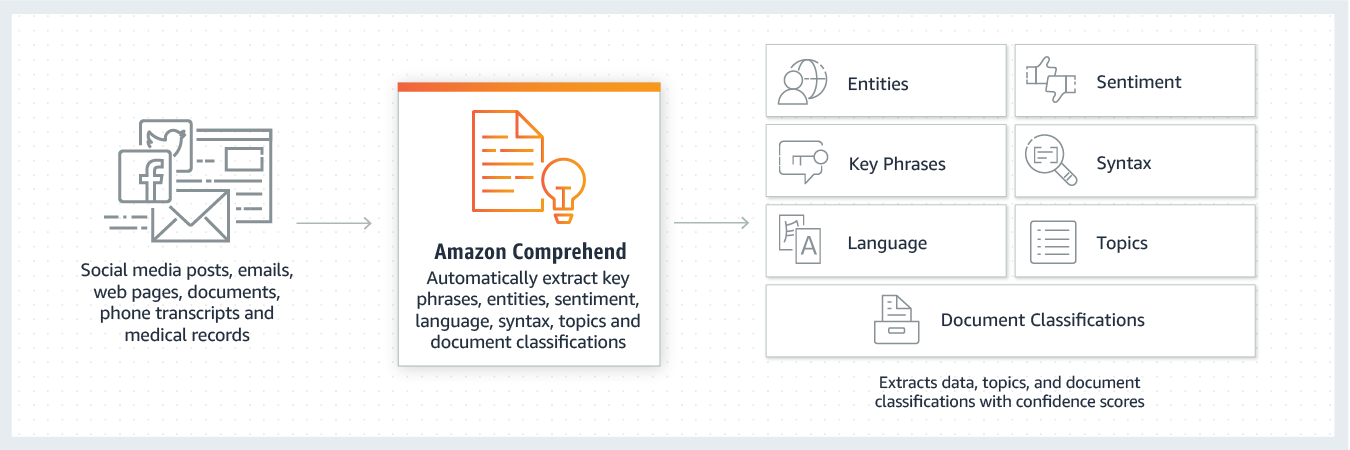


### Key features:
**Keyphrase Extraction**

The Keyphrase Extraction API returns the key phrases or talking points and a confidence score to support that this is a key phrase.

**Sentiment Analysis**

The Sentiment Analysis API returns the overall sentiment of a text (Positive, Negative, Neutral, or Mixed).

**Syntax Analysis**

The Amazon Comprehend Syntax API enables customers to analyze text using tokenization and Parts of Speech (PoS), and identify word boundaries and labels like nouns and adjectives within the text.


**Entity Recognition**

The Entity Recognition API returns the named entities ("People," "Places," "Locations," etc.) that are automatically categorized based on the provided text.

**Language Detection**

The Language Detection API automatically identifies text written in over 100 languages and returns the dominant language with a confidence score to support that a language is dominant.

**Topic Modeling**

Topic Modeling identifies relevant terms or topics from a collection of documents stored in Amazon S3. It will identify the most common topics in the collection and organize them in groups and then map which documents belong to which topic.


**Custom Entities**

Custom Entities allows you to customize Amazon Comprehend to identify terms that are specific to your domain. Using AutoML, Comprehend will learn from a small private index of examples (for example, a list of policy numbers and text in which they are used), and then train a private, custom model to recognize these terms in any other block of text. There are no servers to manage, and no algorithms to master.

**Custom Classification**

The Custom Classification API enables you to easily build custom text classification models using your business-specific labels without learning ML. For example, your customer support organization can use Custom Classification to automatically categorize inbound requests by problem type based on how the customer has described the issue. Creating a custom model is simple. You provide examples of text for each of the labels you want to use, and Comprehend trains on those to create your custom model. No machine learning experience required, you can build your custom model without using a single line of code. An SDK is available for you to integrate your customer classifier into your current applications. With your custom model, it is easy to moderate website comments, triage customer feedback, and organize workgroup documents. Refer to this documentation page for more details.



### Step 1: Import the necessary packages and dataset

You can import necessary packages that are required for this tutorial.

Dataset is provided with notebook in the file Tweets.csv

In [1]:
import pandas as pd
from collections import OrderedDict
import requests

In [2]:
df = pd.read_csv('Tweets.csv')
tweets_df = df['text']
print(tweets_df.tail(5))

14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, dtype: object


### Step 2: Connect to Amazon Comprehend

Make sure you are using the same region for SageMaker Studio as a best practice.

In [3]:
import boto3 
comprehend = boto3.client('comprehend', region_name='us-east-2')

### Step 3: Update SageMaker Execution Role

Update the execution role "AmazonSageMaker-ExecutionRole-Studio" to allow SageMaker Studio to invoke comperhend APIs.

### Step 4: Analyze a tweet using the Amazon Comprehend API

Using the Amazon Comprehend API, you can now analyze a single tweet. You will be able to extract key phrases, entities, and sentiments.

In [4]:
sample_tweet='@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24'  
print(sample_tweet)

# Key phrases
phrases = comprehend.detect_key_phrases(Text=sample_tweet, LanguageCode='en')

# Entities
entities = comprehend.detect_entities(Text=sample_tweet, LanguageCode='en')

#Sentiments
sentiments = comprehend.detect_sentiment(Text=sample_tweet, LanguageCode='en')


# Print the phrases:
print('------- phrases ---------')
for i in range(0, len(phrases['KeyPhrases'])):
    print((phrases['KeyPhrases'][i]['Text']))
    

# Print the entities with entitity type:
print('------- entity : entity type ---------')
for i in range(0, len(entities['Entities'])):
    print(entities['Entities'][i]['Text'] + ' : ' + entities['Entities'][i]['Type'] )
    
# Print the sentiment:
print('------- sentiment ---------')
print(sentiments['Sentiment'])

@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
------- phrases ---------
suicide
the second leading cause
death
------- entity : entity type ---------
VirginAmerica : ORGANIZATION
second : QUANTITY
------- sentiment ---------
NEGATIVE


Choose the Keys and Access Tokens tab and record Consumer Key (API Key), Consumer Secret (API Secret).

Choose Create my access token. After it has been created, record Access Token and Access Token Secret under Your Access Token


In this tutorial we are using an extracted tweets dataset (Tweets.csv) that shows how travelers in February 2015 expressed their feelings on Twitter.

In [5]:
posts = []
timestamp = []
locations = []
sentiments = []
positive = []
negative = []
neutral = []

for i in range(len(df)):
    d = df['text'].iloc[i]
    ts = df['tweet_created'].iloc[i]
    l = df['tweet_location'].iloc[i]
    
    if d != '':
        res = comprehend.detect_sentiment(Text=d, LanguageCode='en')
        s = res.get('Sentiment')
        p = res.get('SentimentScore')['Positive']
        neg = res.get('SentimentScore')['Negative']
        neu = res.get('SentimentScore')['Neutral']
    
    timestamp.append(ts)
    posts.append(d)
    locations.append(l)
    sentiments.append(s)
    positive.append(p)
    negative.append(neg)
    neutral.append(neu)
    
    if i > 50:
        break

### Step 8: Explore the results

DataFrames will be used to merge the input data and comprehend analysis results, so that you can examine and explore the results

**Build a DataFrame**

Using the Python Pandas library, we will build a DataFrame to arrange the extracted information in a tabular form.

In [6]:
import pandas as pd
from collections import OrderedDict

result = pd.DataFrame(OrderedDict( {
            'tweets': posts
         , 'location': pd.Series(locations).str.wrap(15)
         , 'timestamp': timestamp
         , 'sentiment': sentiments
         , 'positiveScore': positive
         , 'negativeScore': negative
         , 'neutralScore' : neutral
         }))

The following code shows how to use DataFrame results to find out the location of positive tweets:


In [7]:
print("Locations that generated positive sentiments in the descending order: ")
result.groupby(by='location')['positiveScore'].mean().sort_values(ascending=False)

Locations that generated positive sentiments in the descending order: 


location
NYC                               0.994366
west covina                       0.990796
Central Texas                     0.980535
Texas                             0.936522
San Francisco\nCA                 0.918785
Oakland via\nMidwest              0.847909
Boston |\nWaltham                 0.839573
Northern\nVirginia                0.827196
Los Angeles                       0.641149
Lets Play                         0.522598
San Francisco,\nCA                0.517245
Worldwide                         0.476736
Iowa City                         0.471101
New York, NY                      0.190443
Somewhere\ncelebrating\nlife.     0.155420
San Diego                         0.096636
Georgia                           0.081131
Turks and\ncaicos                 0.067049
Brooklyn                          0.052544
Boston, MA                        0.043374
this place\ncalled NYC            0.016433
i'm creating a\nmonster           0.010416
San Mateo, CA &\nLas Vegas, NV    0.009812
pa

The following code shows which locations tweeted the most.

In [8]:
result.groupby(by='location', sort = True)['tweets'].count().sort_values(ascending=False)

location
Los Angeles                       5
San Francisco,\nCA                3
Worldwide                         2
Central Texas                     2
NYC                               2
west covina                       1
New York, NY                      1
714                               1
Boston |\nWaltham                 1
Boston, MA                        1
Brooklyn                          1
California, San\nFrancisco        1
Georgia                           1
Iowa City                         1
Lets Play                         1
Northern\nVirginia                1
this place\ncalled NYC            1
Oakland via\nMidwest              1
San Diego                         1
San Francisco\nCA                 1
San Mateo, CA &\nLas Vegas, NV    1
Somewhere\ncelebrating\nlife.     1
Texas                             1
Turks and\ncaicos                 1
Washington DC                     1
i'm creating a\nmonster           1
palo alto, ca                     1
1/1 loner squad    

### Save the data to Amazon S3

Finally, we will push the results to Amazon S3



In [9]:
# Function to upload to S3
from io import StringIO
import boto3

def writeToS3(dframe, bucket, filepath):
    csv = StringIO()
    dframe.to_csv(csv)
    s3 = boto3.resource('s3')
    s3.Object(bucket, filepath).put(Body=csv.getvalue())
    print("The data is successfully written to S3 path:", bucket+"/"+filepath)

# Write to S3
yourBucket =  'mla-hesham'  
file_path = 'comprehend-results/results.csv'
writeToS3(result, yourBucket, file_path)

The data is successfully written to S3 path: mla-hesham/comprehend-results/results.csv


## Conclusion

In this notebook you learned how to use Amazon Comprehend to analyze tweets by extracting entities, doing sentiment analysis and key phrase extraction.